<a href="https://colab.research.google.com/github/jscienciadados/estatistic-datascience/blob/main/Estatistica_Ciencia_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando com Estatística

In [1]:
import numpy as np
import pandas as pd

Carregando a base de dados

In [ ]:
base = pd.read_csv('dados/iris.csv')
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# shape
base.shape

(150, 5)

#<font color="blue">Amostragem Simples</font>

In [ ]:
# Mudança de semente aleatoria para manter os resultados em varias execuções
np.random.seed(2345)

amostra = np.random.choice(a = [0,1], size= 150, replace= True, p = [0.7, 0.3])

# verifica tamanho da amostra
print('amostra original', len(amostra))

# tamanho da amostra para valores 1 e 0
print('amostra igual a 1 ', len(amostra[amostra == 1]))
print('amostra igual a 0 ', len(amostra[amostra == 0]))

amostra original 150
amostra igual a 1  49
amostra igual a 0  101


In [ ]:
base_final = base.loc[amostra == 0]
base_final.shape

(101, 5)

#<font color="green">Amostragem Estratificada</font>

In [ ]:
# Base de Dados
from sklearn.model_selection import train_test_split

In [ ]:
# dados
iris = pd.read_csv("dados/iris.csv")
iris['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [ ]:
# Buscando os previsores -> iris[:, 0:4]
# Buscando somente a classe -> iris[:, 4]
# o _ -> é para os outros valores que nao iremos usar.

x, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4],
                           test_size = 0.5, stratify = iris.iloc[:,4])

y.value_counts()

 


Iris-virginica     25
Iris-setosa        25
Iris-versicolor    25
Name: class, dtype: int64

In [ ]:
# Carregando a base de dados infert e realizando a contagem dos registros
infert = pd.read_csv("dados/infert.csv")
infert.head()

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32


In [ ]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [ ]:
# Criando amostra com somente 40% dos registros -> (por isso é definido 0.6, pois é o inverso)
x1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                                test_size = 0.6, stratify = infert.iloc[:, 1])

y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

#<font color="brown">Amostragem Sistemática</font>

In [ ]:
from math import  ceil

In [ ]:
# criando uma variavel para representar a população, a amostra e o valor de k
populacao = 150
amostra = 15
k = ceil(populacao / amostra)
print(k)

10


In [ ]:
# Definição do valor randomico para inicializar a amostra, iniciando em 1 ate k + 1
r = np.random.randint(low = 1, high= k + 1, size= 1)

In [ ]:
# criamos um for para somar os proximos valores, baseado no primeiro valor r que foi definido acima
acumulador = r[0]
sorteados = []
for i in range(amostra):
  sorteados.append(acumulador)
  acumulador += k
print(sorteados)  

[7, 17, 27, 37, 47, 57, 67, 77, 87, 97, 107, 117, 127, 137, 147]


In [ ]:
len(sorteados)

15

In [ ]:
dados = pd.read_csv("dados/iris.csv")
dados_final = dados.loc[sorteados]
dados_final

,sepal length,sepal width,petal length,petal width,class
7,5.0,3.4,1.5,0.2,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor


# Medidas de Centralidade e Variabilidade

In [ ]:
from scipy import stats

In [ ]:
# criação da variavel com os dados dos jogadores, visualização da mediana
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]

# media
print('média', np.mean(jogadores))

181111.11111111112

In [ ]:
# mediana
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]
print('mediana', np.median(jogadores))
# criação da variavel para geração dos quartis (0%, 25%, 50%, 75% e 100%)
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
print('quartis ', quartis)

mediana 40000.0
quartis  [ 12000.  30000.  40000. 250000. 800000.]


In [ ]:
# desvio padrao
print('desvio padrão', np.std(jogadores))

desvio padrão 240706.5730739143


In [ ]:
# describe
print('Estatísticas Descritivas: ', stats.describe(jogadores))

Estatísticas Descritivas:  DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)


#<font color="yellow">Distribuição Normal</font>

In [ ]:
# import da função norm
from scipy.stats import norm

In [ ]:
# Conjunto de dados em uma cesta, a media é 8 e o desvio padrao é 2.
# Qual a probabilidade de tirar um dado que peso que 6 kilos?
print('A probabilidade de tirar o dado com peso menor que 6kg é ', norm.cdf(6, 8, 2))

A probabilidade de tirar o dado com peso menor que 6kg é  0.15865525393145707


In [ ]:
# Qual a probabilidade de tirar um objeto que o peso é maior que 6 kg?
print('A probabilidade de tirar o dados com mais de 6kg é ', norm.sf(6, 8, 2))
# ou
print('ou realizar assim: 1 - norm.cdf(6, 8, 2)', 1 - norm.cdf(6, 8, 2))

A probabilidade de tirar o dados com mais de 6kg é  0.8413447460685429
ou realizar assim: 1 - norm.cdf(6, 8, 2) 0.8413447460685429


In [ ]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 6 ou maior que 10 kg.
print('a probabilidade é: ', norm.cdf(6, 8, 2) + norm.sf(10, 8, 2))

a probabilidade é:  0.31731050786291415


In [ ]:
# Qual a probalidade de tirar um objeto que o peso é menor que 10kg e maior que 8kg?
print('A probabilidade é de: ', norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2))

A probabilidade é de:  0.3413447460685429


#<font color="blue">Testes de Normalidade</font>

In [ ]:
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt


In [ ]:
# Criação de uma variavel com dados em uma distribuição normal com a função rvs (100 elementos)
data = norm.rvs(size = 1000)
data

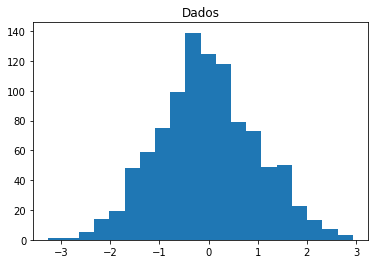

In [ ]:
# histograma
plt.hist(data, bins= 20)
plt.title('Dados')
plt.show()

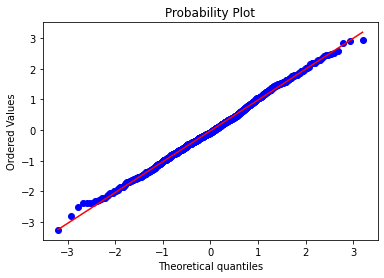

In [ ]:
# Geração de grafico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(data, fit=True, plot=ax)
plt.show()

In [ ]:
# Execução do teste de shapiro
# segundo argumento é o valor de p, não há como rejeitar a hipotese nula
stats.shapiro(data)

(0.9977028369903564, 0.17928571999073029)

In [ ]:
# dados não normais
dados2 = skewnorm.rvs(4, size=1000)

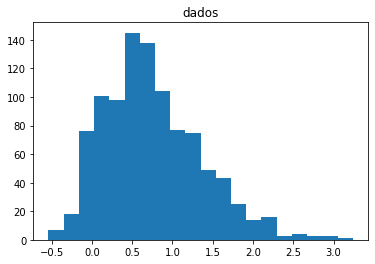

In [ ]:
# histograma
plt.hist(dados2, bins= 20)
plt.title('dados')
plt.show()

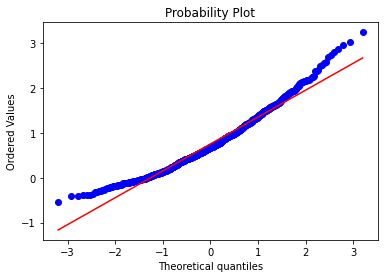

In [ ]:
# Geração de gafico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados2, fit=True, plot=ax)
plt.show()

In [ ]:
# shapiro test
stats.shapiro(dados2)

(0.968959629535675, 8.809363557637367e-14)

#<font color="orange">Intervalo de Confiança para a Média</font>

#Queremos estimar o salario médio de um cientista de dados

100 pesquisados (n)

intervalo de confiança: 95%

a desvio padrao e 1100,00

a media do salario é de 5.800,00

valor de z* = 1,96



In [ ]:
import math
margem_erro = 1.96*(1100/math.sqrt(100))

In [ ]:
salario = 5800 + margem_erro
salario

6015.6

In [ ]:
salario = 5800 - margem_erro
salario

5584.4

O salario do cientista de dados varia entre 5584,40 e 6015,60.

In [ ]:
z = (23 - 22)/4/math.sqrt(100) * 100 # -> valor z

In [ ]:
z

2.5

In [ ]:
# p-value
p = (0.77 - 0.75)/math.sqrt(0.75 * 0.25)/100

In [ ]:
p

0.00046188021535170106

#<font color="red">Distribuição T de Studant</font>

Uma pesquisa mostra que cientistas de dados ganham R$75,00 por hora. uma amostra de 9 cientistas é selecionada e perguntado o salario. O desvio padrao da amostra é 10. Qual a probabilidade do salario ser menor que #R$80,00 a hora.

U0 = 75,00 (media da população)

s = 10 (desvio padrao da amostra)

n = 9 (tamanho da amostra)

t0 = 8 (graus de liberdade)


In [ ]:
from scipy.stats import t

In [ ]:
# Qual a probabilidade de selecionar um cientista e o salario ser menor que R$80,00 por hora
sal_menor_80 = t.cdf(1.5, 8)
sal_menor_80

0.9139983540240443

In [ ]:
#Qual a probabilidade de selecionar um cientista e o salario maior que 80,00?
sal_maior_80 = t.sf(1.5, 8)
sal_maior_80

0.08600164597595565

In [ ]:
# somatorio da execução dos dois codigos acima (lado esquerdo + lado direito da distribuição)
somatorio = t.cdf(1.5, 8) + t.sf(1.5, 8)
somatorio

0.9999999999999999

#<font color="blue">Distribuição Bonimial</font>

Distribuição de Probabilidade Discreta

In [ ]:
from scipy.stats import binom

In [ ]:
# jogar uma moeda 5 vezes. Qual a probabilidade de dar cara 3 vezes?
# eventos - experimentos - probabilidades
prob = binom.pmf(3, 5, 0.5)
prob

0.3125

In [ ]:
# passar 4 sinais de 4 tempos, qual a probabilidade de pegar sinal verde
# 0, 1, 2, 3 ou 4 vezes seguidas?
sinal0 = binom.pmf(0, 4, 0.25)
sinal1 = binom.pmf(1, 4, 0.25)
sinal2 = binom.pmf(2, 4, 0.25)
sinal3 = binom.pmf(3, 4, 0.25)
sinal4 = binom.pmf(4, 4, 0.25)
print('sinal 0 ', sinal0, 'sinal 1', sinal1, ' sinal 2', sinal2, ' sinal 3', sinal3, ' sinal 4', sinal4)
print('probabilidade cumulativa: ', sinal0 + sinal1 + sinal2 + sinal3 + sinal4)


sinal 0  0.31640625000000006 sinal 1 0.4218750000000001  sinal 2 0.21093750000000006  sinal 3 0.046875000000000035  sinal 4 0.003906250000000001
probabilidade cumulativa:  1.0000000000000002


In [ ]:
# e se for de 2 tempos?
dois_tempos = binom.pmf(4, 4, 0.5)
print(dois_tempos)
# probabilidade cumulativa para 4 semaforos
cumulative_prob = binom.cdf(4, 4, 0.25)
print(cumulative_prob)

0.0625
1.0


In [ ]:
# Concurso com 12 questoes, qual a probabilidade de acertar 7 questoes chutando tudo, considerando cada questao com 4 alternativa?
concurso = binom.pmf(7, 12, 0.25) * 100
concurso

1.1471271514892574

In [ ]:
# Qual a probabilidade de acertar as 12 questões?
total_questoes = binom.pmf(12, 12, 0.25) * 100
total_questoes

5.960464477539072e-06

#<font color="green">Distribuição de Poison</font>

=> Mede a probabilidade de eventos em intervalos de tempo, em vez de um certo numero de experimentos

=> Os eventos a cada intervalo devem ser independentes.

In [ ]:
from scipy.stats import poisson

Em um local ocorrem em media dois acidentes por dia.

In [ ]:
# qual a probabilidade de ocorrerem 3 acidentes no dia?
tres_acidentes = poisson.pmf(3, 2)
print('A probabilidade de ocorrer 3 acidente em um dia é de: ', tres_acidentes)

A probabilidade de ocorrer 3 acidente em um dia é de:  0.18044704431548356


In [ ]:
# qual a probabilidade de ocorrerem 3 ou menos acidentes em um dia?
tres_ou_menos_acidentes = poisson.cdf(3, 2)
print('A probabilidade de ocorrerem 3 ou menos acidentes em um dia é de ', tres_ou_menos_acidentes)

A probabilidade de ocorrerem 3 ou menos acidentes em um dia é de  0.857123460498547


In [ ]:
# qual a probabilidade de ocorrerem mais de 3 acidentes em um dia?
mais_de_tres_acidentes = poisson.sf(3, 2)
print('A probabilidade de ocorrer mais de 3 acidentes em um dia é de ', mais_de_tres_acidentes)

A probabilidade de ocorrer mais de 3 acidentes em um dia é de  0.14287653950145296


#<font color="orange">Qui-Quadrado</font>

=> H0 -> Não existe diferença significativa além do acaso

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# criação da matriz com os dados e exucução do teste
novela = np.array([[19, 6], [43, 32]])
novela

array([[19,  6],
       [43, 32]])

In [ ]:
# executando o teste de qui-quadrado
# o valor de p é maior que 0.05, não há evidencias de diferença significativa (hipotese nula) -> p-value = 0.1534...
novela_teste = chi2_contingency(novela)
print(novela_teste)

(2.037351443123939, 0.15347667161786666, 1, array([[15.5,  9.5],
       [46.5, 28.5]]))


In [ ]:
novela2 = np.array([[22, 3], [43, 32]])
novela2

array([[22,  3],
       [43, 32]])

In [ ]:
# Agora o valor de p é menor que 0.05, podemos rejeitar a hipotese nula em favor da hipotese alternativa: -> p-value =0.0110...
test_novela = chi2_contingency(novela2)
print(test_novela)

(6.461538461538461, 0.011023416388221425, 1, array([[16.25,  8.75],
       [48.75, 26.25]]))


#<font color="blue">ANOVA - Análise de Variância</font>

In [ ]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
# carregando a base de dados
tratamento = pd.read_csv("dados/anova.csv", sep= ";")
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


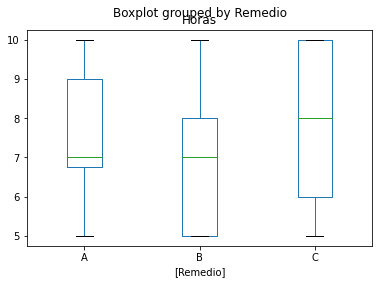

In [ ]:
# boxplot agrupando os dados pelo remedio
tratamento.boxplot(by= 'Remedio', grid= False)

In [ ]:
# criação do modelo de regressão linear e execução do teste
modelo1 = ols('Horas ~ Remedio', data= tratamento).fit()
resultado1 = sm.stats.anova_lm(modelo1)
#observar o valor p é maior que 0.05 (pr(>f)) -> Hipotese nula não há diferença significativa
resultado1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [ ]:
# criação do segundo modelo utilizando mais atributos e execução do teste
modelo2 = ols('Horas ~ Remedio * Sexo', data= tratamento).fit()
resultado2 = sm.stats.anova_lm(modelo2)
# nenhum valor de p mostra diferença significa
resultado2


,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


# Teste de Tukey

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


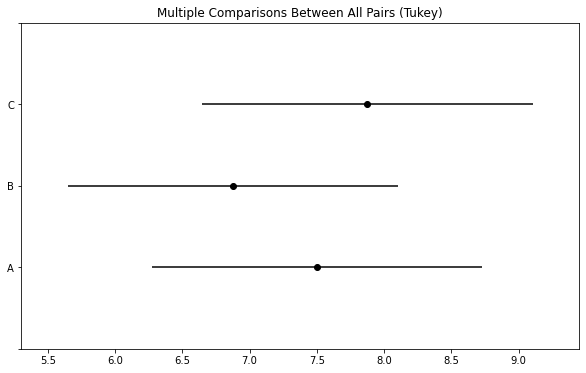

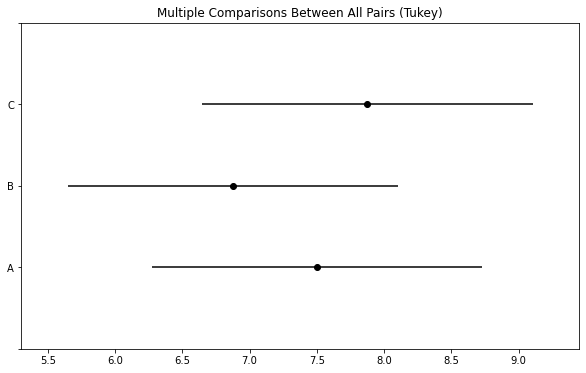

In [ ]:
# se houver diferença o teste de tukey é executado.
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_tukey = mc.tukeyhsd()
print(resultado_tukey)
resultado_tukey.plot_simultaneous()